# Avocada-ML-Project


#Observation: Avacado is a fruit consumed by people heavily in United states. Content: This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website: > The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table. Some relevant columns in the dataset: Date - The date of the observation AveragePrice - the average price of a single avocado type - conventional or organic year - the year Region - the city or region of the observation Total Volume - Total number of avocados sold 4046 - Total number of avocados with PLU 4046 sold 4225 - Total number of avocados with PLU 4225 sold 4770 - Total number of avocados with PLU 4770 sold

In [1]:
# importing essential libraries :
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset :
data=pd.read_csv('avocado.csv', index_col=[0])

In [3]:
# lets check the first five records :
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# lets check the last five records :
data.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
# shape of the dataset (Rows, Columns) :
data.shape

(18249, 13)

In [6]:
# names of the columns :
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [7]:
# totalinformation of the given dataset :
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [8]:
# check the null values :
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
data['year']=pd.to_datetime(data['Date']).dt.year

In [10]:
data['month']=pd.to_datetime(data['Date']).dt.month

In [11]:
data['day']=pd.to_datetime(data['Date']).dt.day

In [12]:
# now we will drop the date column :
data.drop('Date',axis=1,inplace=True)

In [13]:
# lets check the dataset :
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [14]:
# we will drop the type column for now :
data.drop('type',axis=1,inplace=True)

In [15]:
data.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,12,20


In [16]:
# importing scikit learn library for LabelEncoder :
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['region']=le.fit_transform(data['region'])
## we have now converted the region column :

<function matplotlib.pyplot.show(*args, **kw)>

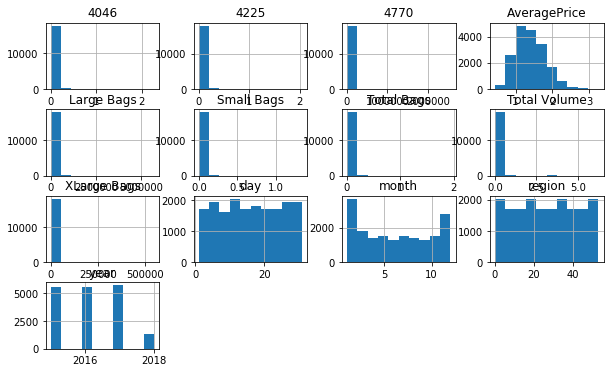

In [17]:
# lets plot the histogram of the columns :
data.hist(figsize=(10,6))
plt.show

AxesSubplot(0.125,0.125;0.775x0.755)


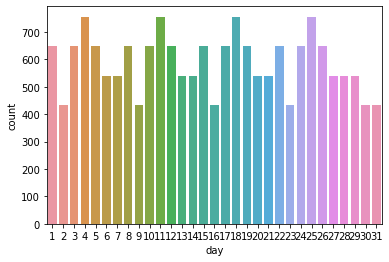

In [18]:
# Univariate analysis :
print(sns.countplot(data['day']))

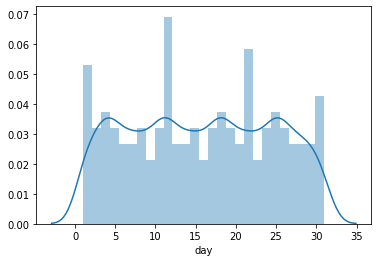

In [19]:
# Univariate Analysis of day column :
sns.distplot(data['day'])

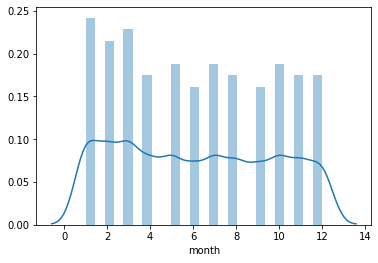

In [20]:
sns.distplot(data['month'])

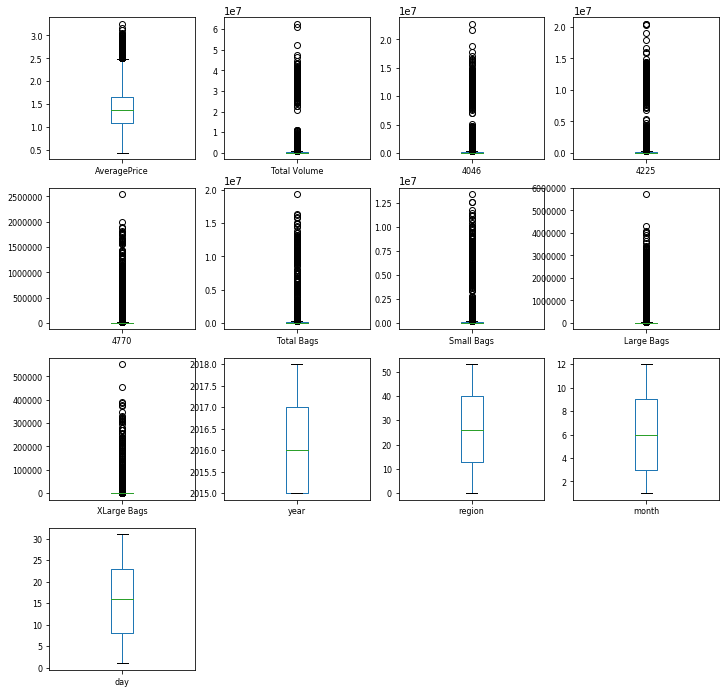

In [21]:
# box plot for the better visualisation of all columns :
data.plot(kind='box',subplots=True,layout=(4,4),fontsize=8,figsize=(12,12))
plt.show()

In [22]:
# lets check the skewness :
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
region           0.000030
month            0.106617
day              0.014310
dtype: float64

In [23]:
# check the outliers from the dataset :
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(18249, 13)
(17651, 13)


In [24]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
region           0.000030
month            0.106617
day              0.014310
dtype: float64

In [25]:
# we will use for loop for removing skewness :
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [26]:
data.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
region          0.000030
month           0.106617
day             0.014310
dtype: float64

In [27]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [28]:
data.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     0.840536
year            0.215339
region          0.000030
month           0.106617
day             0.014310
dtype: float64

In [29]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [30]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [31]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [32]:
data.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     0.709558
year            0.215339
region          0.000030
month           0.106617
day             0.014310
dtype: float64

In [33]:
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [34]:

for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [35]:
data.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     0.694246
year            0.215339
region          0.000030
month           0.106617
day             0.014310
dtype: float64

In [36]:
# Stastistical Analysis :
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
count,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,0.864300,11.316380,8.992344,9.836480,5.053649,10.188148,9.698227,7.115979,0.122522,2016.147899,26.495644,6.177215,15.662612
std,0.164696,2.293415,3.358087,2.850342,4.150570,2.261495,2.575460,3.837418,0.171314,0.939938,15.583788,3.534130,8.776281
min,0.364643,4.449218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,0.741937,9.290960,6.751183,8.009622,0.000000,8.534962,7.955222,4.855695,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,0.862890,11.584108,9.064887,10.277187,5.225693,10.590235,10.179748,7.881828,0.000000,2016.000000,26.000000,6.000000,16.000000
75%,0.978326,12.978408,11.617476,11.919775,8.739444,11.615341,11.330668,10.000172,0.355517,2017.000000,40.000000,9.000000,23.000000
max,1.446919,17.950767,16.939795,16.834499,14.750207,16.779398,16.409614,15.559322,0.387367,2018.000000,53.000000,12.000000,31.000000


In [37]:
# correlation of the given dataset :
dfr=data.corr()
dfr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
AveragePrice,1.000000,-0.592833,-0.556817,-0.457034,-0.518407,-0.579452,-0.496176,-0.484128,-0.419057,0.092480,-0.016902,0.163963,0.032275
Total Volume,-0.592833,1.000000,0.886538,0.908610,0.834274,0.934924,0.876670,0.671429,0.654372,0.086274,0.111673,-0.034262,-0.010493
4046,-0.556817,0.886538,1.000000,0.761893,0.747167,0.785653,0.741634,0.582992,0.587406,0.011078,0.191000,-0.033224,-0.007349
4225,-0.457034,0.908610,0.761893,1.000000,0.794104,0.790640,0.722492,0.614586,0.586006,0.014321,0.072366,-0.030705,-0.008917
4770,-0.518407,0.834274,0.747167,0.794104,1.000000,0.773176,0.747692,0.558938,0.644796,-0.040618,0.071842,-0.025808,-0.002803
Total Bags,-0.579452,0.934924,0.785653,0.790640,0.773176,1.000000,0.929040,0.709648,0.624242,0.222446,0.105552,-0.022617,-0.008874
Small Bags,-0.496176,0.876670,0.741634,0.722492,0.747692,0.929040,1.000000,0.526174,0.592697,0.202987,0.078192,-0.017234,-0.006399
Large Bags,-0.484128,0.671429,0.582992,0.614586,0.558938,0.709648,0.526174,1.000000,0.463829,0.193857,0.113016,-0.020540,-0.003034
XLarge Bags,-0.419057,0.654372,0.587406,0.586006,0.644796,0.624242,0.592697,0.463829,1.000000,0.159927,0.015556,0.013422,0.007317
year,0.092480,0.086274,0.011078,0.014321,-0.040618,0.222446,0.202987,0.193857,0.159927,1.000000,-0.000055,-0.177050,0.004475


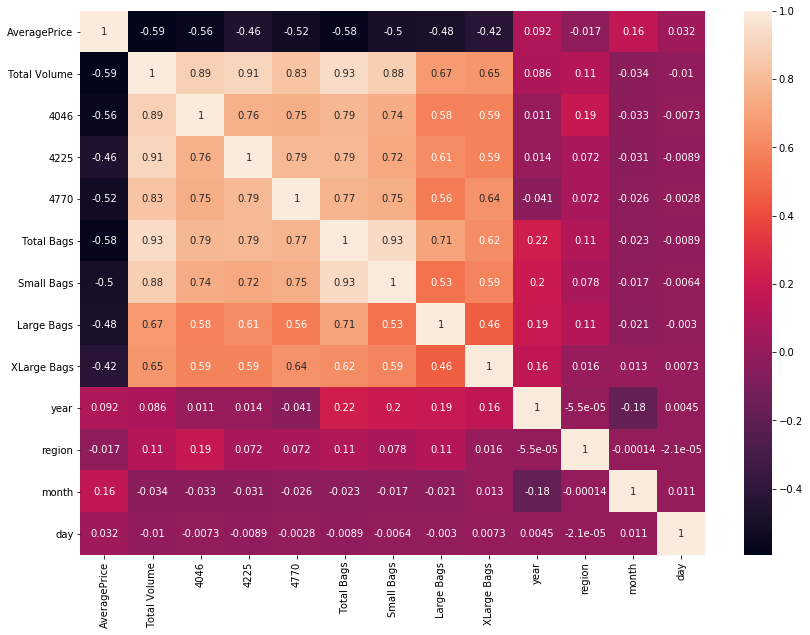

In [38]:
# Correlation of data by heatmap :
plt.figure(figsize=(14,10))
sns.heatmap(dfr,annot=True)
plt.show()

In [39]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,0.845868,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,0,12,27
1,0.854415,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,0,12,20
2,0.657520,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,0,12,13
3,0.732368,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,0,12,6
4,0.824175,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,0,11,29


In [40]:
# splitting the data into X and y :
X=data.drop('AveragePrice',axis=1)
y=data['AveragePrice']

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Regression

In [42]:
# importing the sklearn library :
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
pred

array([0.78837864, 0.79068545, 0.89861836, ..., 0.70017651, 0.93429942,
       0.96027292])

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.09465190280631451
MSE: 0.013830775480958395
RMSE: 0.11760431744182862


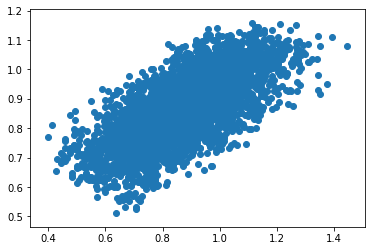

In [44]:
plt.scatter(x=y_test,y=pred)

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted-Y')

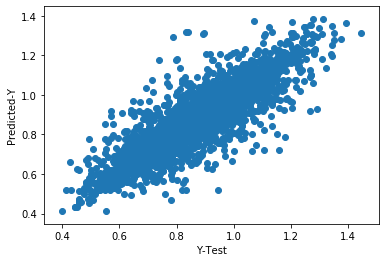

In [46]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y-Test')
plt.ylabel('Predicted-Y')

In [47]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.052956126811751096
MSE: 0.006475381201466333
RMSE: 0.0804697533329532


In [48]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.038490636531847575
MSE: 0.0028733360550994443
RMSE: 0.053603507861887584


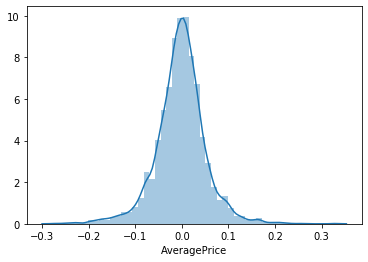

In [50]:
sns.distplot((y_test-pred),bins=50)

,Y Test,Pred
6,0.598837,0.646557
8,0.678034,0.679265
48,0.891998,0.873805
42,0.678034,0.641395
45,0.896088,0.892681


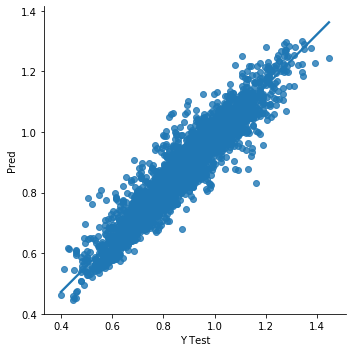

In [51]:
# Predicting the model :
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

In [52]:
data=pd.read_csv('avocado.csv', index_col=[0])

In [53]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [54]:
data['year']=pd.to_datetime(data['Date']).dt.year

In [55]:
data['month']=pd.to_datetime(data['Date']).dt.month

In [56]:
data['day']=pd.to_datetime(data['Date']).dt.day

In [57]:
data.drop('Date',axis=1,inplace=True)

In [58]:
data.drop('type',axis=1,inplace=True)

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['region']=le.fit_transform(data['region'])

In [60]:
# lets check the first five records :
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,11,29


In [61]:
# lets check the last five records :
data.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,month,day
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53,1,14
11,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,2018,53,1,7


In [62]:
data.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
region           0.000030
month            0.106617
day              0.014310
dtype: float64

In [63]:
# check the outliers from the dataset :
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(18249, 13)
(17651, 13)


In [64]:
# removing the outliers :
for i in data.columns:
    if data.skew().loc[i]>0.55:
        data[i]=np.log1p(data[i])

In [65]:
data.skew()

AveragePrice    0.138629
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
region          0.000030
month           0.106617
day             0.014310
dtype: float64

In [66]:
# splitting the dataset :
X=data.drop('region',axis=1)
y=data['region']

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [68]:
# importing the esential libraries :
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [69]:
# we will make list of algorithm and add to for loop and check the score :
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB(),RandomForestClassifier()]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\Users\Scp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.18684931506849314
[[22  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ... 34  8  0]
 [ 0  2  0 ... 36  2  1]
 [ 2  1  1 ...  0  1  1]]
              precision    recall  f1-score   support

           0       0.21      0.35      0.26        63
           1       0.14      0.27      0.19        73
           2       0.09      0.11      0.10        61
           3       0.00      0.00      0.00        72
           4       0.15      0.19      0.17        67
           5       0.00      0.00      0.00        73
           6       0.32      0.58      0.41        62
           7       0.29      0.30      0.30

C:\Users\Scp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') is:
0.3613698630136986
[[38  0  1 ...  0  0  0]
 [ 0 17  0 ...  0  2  0]
 [ 1  0 40 ...  0  0  1]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  1  0 ...  0 39  0]
 [ 0  2  2 ...  0  0  9]]
              precision    recall  f1-score   support

           0       0.27      0.60      0.37        63
           1       0.11      0.23      0.15        73
           2       0.35      0.66      0.46        61
           3       0.41      0.54      0.46        72
           4       0.32      0.28      0.30        67
           5       0.20      0.22      0.21        73
           6       0.42      0.61      0.50        62
           7       0.36      0.59      0.45        76
           8       0.70      0.64      0.67        72
           9       0.19      0.32      0.24        65
          10       0.

C:\Users\Scp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) is:
0.9087671232876713
[[58  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 67  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  0  0 ...  0  0 51]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        63
           1       0.86      0.84      0.85        73
           2       0.95      0.98      0.97        61
           3       0.91      0.88      

In [70]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
accuracy_score(y_test, pred)

0.7901369863013699

In [71]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
accuracy_score(y_test, pred)

0.903013698630137

In [72]:
# saving the model :
import joblib
joblib.dump(rfc,'Project3_avacoda')

['Project3_avacoda']

Conclusion:1) These problem we have solved by Regresion as well as Classification.
2) We have done EDA process, Feature Engineering, Model Selection, finding the right model.
3) for Regression problem (RandomforestRegressor is best) 
4) for Clasification problem (RandomForestClassifier is best)
5) Saving the model.
Thank You!!